<a href="https://colab.research.google.com/github/Manojkumar-Siva/basic-nn-model/blob/main/DL_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow import keras as k
import matplotlib.pyplot as plt


In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('newdata').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'int'})
df = df.astype({'Output':'int'})
df.head()

,Input,Output
0,1,5
1,2,10
2,3,15
3,4,20
4,5,25


In [ ]:
X=df[['Input']].values
Y=df[['Output']].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=33)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=scaler.transform(x_train)
x_train1

array([[1. ],
       [0.3],
       [0.4],
       [0.1],
       [0.7],
       [0.9],
       [0. ],
       [0.6],
       [0.5],
       [0.2]])

In [ ]:
ai_brain=Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [ ]:
ai_brain.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 1726.1832
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 1724.2917
Epoch 3/2000
1/1 [==============================] - 0s 15ms/step - loss: 1722.9102
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 1721.7535
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 1720.7252
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 1719.7828
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 1718.9075
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 1718.0769
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 1717.2810
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 1716.5144
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 1715.7676
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 1715.0359
Epoc

<AxesSubplot:>

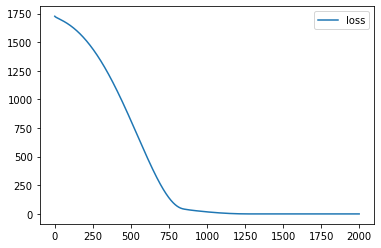

In [ ]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
x_test1=scaler.transform(x_test)

In [ ]:
ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.0047


0.004697722848504782

In [ ]:
x_n1=[[4]]

In [ ]:
x_n1_1=scaler.transform(x_n1)

In [ ]:
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 64ms/step


array([[20.034653]], dtype=float32)